In [1]:
from pylab import *
import time

import matplotlib.backends
import matplotlib.pyplot as p
import os.path


def is_backend_module(fname):
    """Identifies if a filename is a matplotlib backend module"""
    return fname.startswith('backend_') and fname.endswith('.py')

def backend_fname_formatter(fname): 
    """Removes the extension of the given filename, then takes away the leading 'backend_'."""
    return os.path.splitext(fname)[0][8:]

# get the directory where the backends live
backends_dir = os.path.dirname(matplotlib.backends.__file__)

# filter all files in that directory to identify all files which provide a backend
backend_fnames = filter(is_backend_module, os.listdir(backends_dir))

backends = [backend_fname_formatter(fname) for fname in backend_fnames]

print "supported backends: \t" + str(backends)

# validate backends
backends_valid = []
for b in backends:
    try:
        p.switch_backend(b)
        backends_valid += [b]
        print 'Backend ', b, ' supported and validated.'
    except:
        continue


supported backends: 	['agg', 'cairo', 'cocoaagg', 'gdk', 'gtk', 'gtk3', 'gtk3agg', 'gtk3cairo', 'gtkagg', 'gtkcairo', 'macosx', 'mixed', 'nbagg', 'pdf', 'pgf', 'ps', 'qt4', 'qt4agg', 'qt5', 'qt5agg', 'svg', 'template', 'tkagg', 'webagg', 'webagg_core', 'wx', 'wxagg']
Backend  agg  supported and validated.
Backend  nbagg  supported and validated.
Backend  pdf  supported and validated.
Backend  pgf  supported and validated.
Backend  ps  supported and validated.
Backend  qt4agg  supported and validated.
Backend  qt5agg  supported and validated.
Backend  svg  supported and validated.
Backend  template  supported and validated.
Backend  tkagg  supported and validated.
Backend  webagg  supported and validated.


In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py

In [4]:
# Load data, specifically AAPL minute OHLC data from 2015-07-14
data = pd.read_csv('https://drive.google.com/uc?export=download&id=0B9-kA56h5JCMbXptY0kyVXZXaUU',
                 index_col=0, parse_dates=True)
time = data.index
data['SMA5'] = pd.rolling_mean(data.CLOSE, 5)
data['SMA20'] = pd.rolling_mean(data.CLOSE, 20)

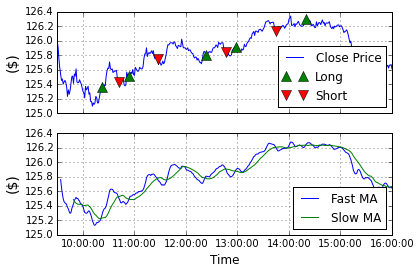

In [5]:
tol = 0.01    # Tolerance.

long_signal = (data.SMA5.shift() < data.SMA20.shift()) & (data.SMA5 > data.SMA20 + tol)
short_signal = (data.SMA5.shift() > data.SMA20.shift()) & (data.SMA5 < data.SMA20 - tol)

fig, ax = plt.subplots(2, sharex=True)

ax[0].plot(time, data.CLOSE, label='Close Price')
ax[0].plot(time[long_signal], data.CLOSE[long_signal], linestyle='None', marker='^', 
           color='g', markersize=10, label='Long')
ax[0].plot(time[short_signal], data.CLOSE[short_signal], linestyle='None', marker='v',
           color='r', markersize=10, label='Short')
ax[0].set_ylabel('($)', fontsize=14)
ax[0].legend(loc='lower right')
ax[0].grid()

ax[1].plot(time, data.SMA5, label='Fast MA')
ax[1].plot(time, data.SMA20, label='Slow MA')
ax[1].set_ylabel('($)', fontsize=14)
ax[1].set_xlabel('Time', fontsize=12)
ax[1].legend(loc='lower right')
ax[1].grid()

In [6]:
for b in backends_valid:
    try:
        p.switch_backend(b)
        py.iplot_mpl(fig)
    except:
        print 'Backend ', b, ' does not work.'
        continue

Backend  agg  does not work.
Backend  nbagg  does not work.
Backend  pdf  does not work.
Backend  pgf  does not work.
Backend  ps  does not work.
Backend  qt4agg  does not work.
Backend  qt5agg  does not work.
Backend  svg  does not work.
Backend  template  does not work.
Backend  tkagg  does not work.
Backend  webagg  does not work.
